## Gezgin Satıcı Probleminin En Yakın Komşuluk Algorithması ile /Greedy Çözüme Ulaştırılması---Genetik Algortima İle Aynı Veri Setine Sahip Çalışmadır.Populer Harita Gezgin Santa Harita Verileri Kullanılmıştır

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import random 

In [2]:
df_cities = pd.read_csv("cities.csv")
df_cities.head(10)

CityId            X            Y
0       0   316.836739  2202.340707
1       1  4377.405972   336.602082
2       2  3454.158198  2820.053011
3       3  4688.099298  2935.898056
4       4  1010.696952  3236.750989
5       5  2474.230877  1435.514651
6       6  1029.277795  2721.800952
7       7  3408.887685   199.585793
8       8  1304.006125  2657.427246
9       9  4211.525725  2294.595208

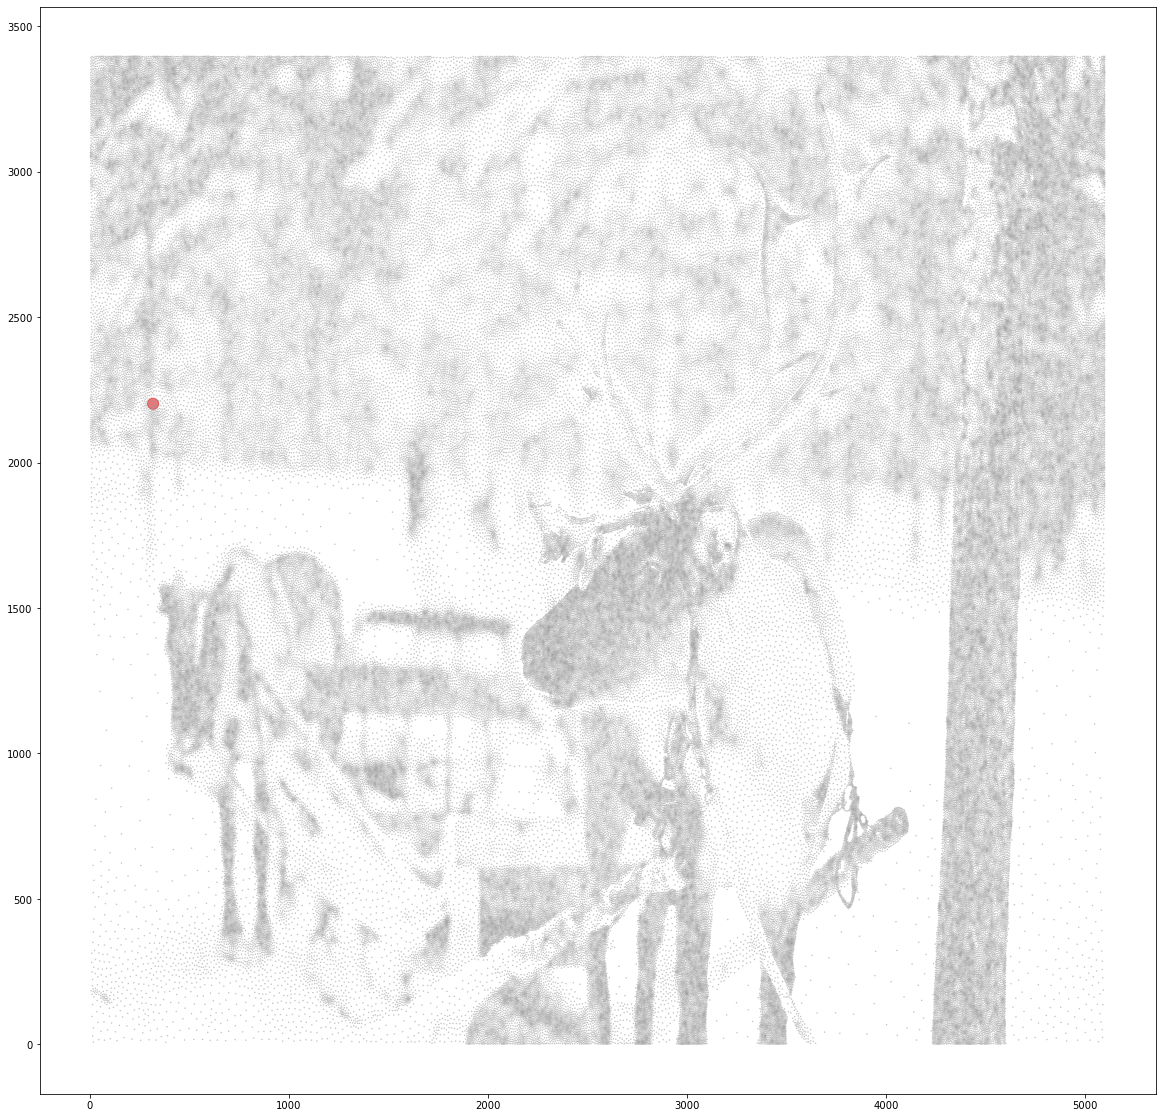

In [3]:
fig = plt.figure(figsize=(20,20))
#cmap, norm = from_levels_and_colors([0.0, 0.5, 1.5], ['red', 'black'])
plt.scatter(df_cities['X'],df_cities['Y'],marker = '.',c=(df_cities.CityId != 0).astype(int), cmap='Set1', alpha = 0.6, s = 500*(df_cities.CityId == 0).astype(int)+1)
plt.show()

Kırmızı nokta Kuzey Kutbu'nu gösterir (CityId = 0).Süreç, kırmızı noktadan giden, diğer tüm noktalara dokunan ve kat edilen minimum toplam mesafe ile kırmızı noktaya geri dönen bir yol bulma süreci olarak belirlenmiştir.

In [4]:
# pozisyona göre asal olup olmadığı. 

# eratosten elek metodu kullanarak
def sieve_of_eratosthenes(n):
    primes = [True for i in range(n+1)] # Start assuming all numbers are primes
    primes[0] = False # 0 is not a prime
    primes[1] = False # 1 is not a prime
    for i in range(2,int(np.sqrt(n)) + 1):
        if primes[i]:
            k = 2
            while i*k <= n:
                primes[i*k] = False
                k += 1
    return(primes)
prime_cities = sieve_of_eratosthenes(max(df_cities.CityId))

In [5]:
def total_distance(dfcity,path):
    prev_city = path[0]
    total_distance = 0
    step_num = 1
    for city_num in path[1:]:
        next_city = city_num
        total_distance = total_distance + \
            np.sqrt(pow((dfcity.X[city_num] - dfcity.X[prev_city]),2) + pow((dfcity.Y[city_num] - dfcity.Y[prev_city]),2)) * \
            (1+ 0.1*((step_num % 10 == 0)*int(not(prime_cities[prev_city]))))
        prev_city = next_city
        step_num = step_num + 1
    return total_distance

dumbest_path = list(df_cities.CityId[:].append(pd.Series([0])))
print('Total distance with the dumbest path is '+ "{:,}".format(total_distance(df_cities,dumbest_path)))

Total distance with the dumbest path is 446,884,407.5212135


En aptal yolun ilk 100 adımına bir göz atalım.

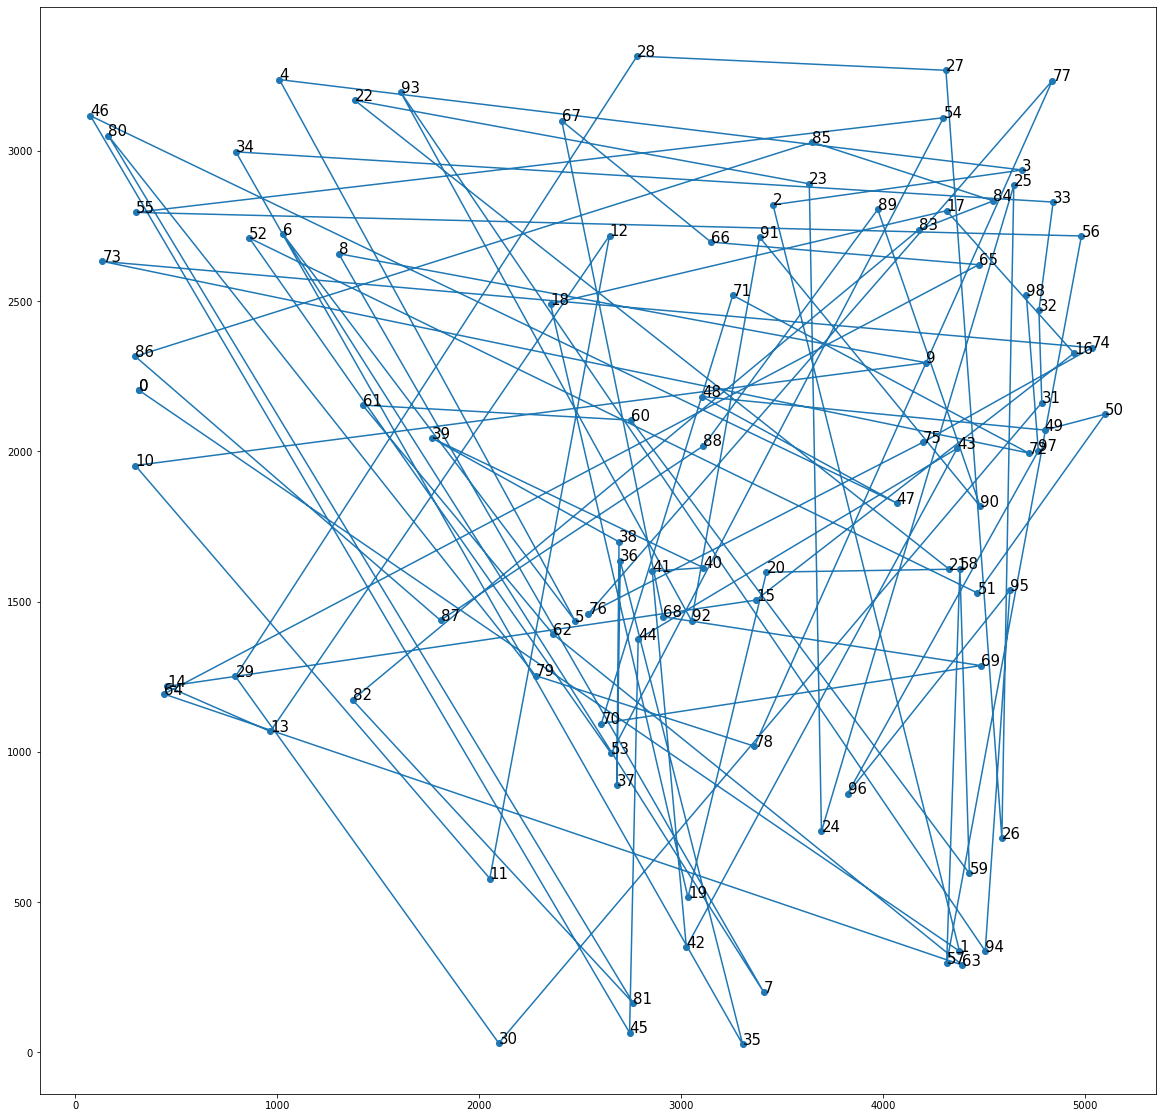

In [6]:
df_path = pd.merge_ordered(pd.DataFrame({'CityId':dumbest_path}),df_cities,on=['CityId'])
fig, ax = plt.subplots(figsize=(20,20))
ax.plot(df_path.iloc[0:100,]['X'], df_path.iloc[0:100,]['Y'],marker = 'o')
for i, txt in enumerate(df_path.iloc[0:100,]['CityId']):
    ax.annotate(txt, (df_path.iloc[0:100,]['X'][i], df_path.iloc[0:100,]['Y'][i]),size = 15)

Biraz daha iyi yol araştırması için: şehirler X,Y koordinatlarında sıralanmıştır.

In [7]:
sorted_cities = list(df_cities.iloc[1:,].sort_values(['X','Y'])['CityId'])
sorted_cities = [0] + sorted_cities + [0]
print('Total distance with the sorted city path is '+ "{:,}".format(total_distance(df_cities,sorted_cities)))

Total distance with the sorted city path is 196,478,811.25956938


Basit bir sıralama kullanarak toplam mesafemizi zaten yarıdan fazla azalttık !! Haritada nasıl göründüğüne bakalım (yakınlaştırılmış).

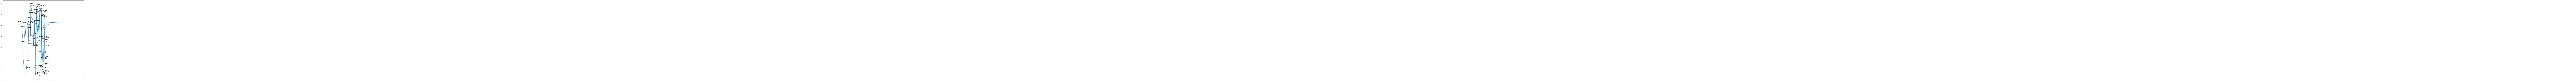

In [8]:
df_path = pd.DataFrame({'CityId':sorted_cities}).merge(df_cities,how = 'left')
fig, ax = plt.subplots(figsize=(20,20))
ax.set_xlim(0,10)
ax.plot(df_path.iloc[0:100,]['X'], df_path.iloc[0:100,]['Y'],marker = 'o')
for i, txt in enumerate(df_path.iloc[0:100,]['CityId']):
    ax.annotate(txt, (df_path.iloc[0:100,]['X'][i], df_path.iloc[0:100,]['Y'][i]),size = 15)

Yukarıdaki çizimden, şimdi Satıcının(Noel Baba)'nın bir sonraki X'e geçmeden önce aynı X değeri (X ekseninin yalnızca 0-10 arasında değiştiğine dikkat edin) etrafında yukarı ve aşağı gittiğini görebiliriz. Bu biraz daha verimli bir yoldur.

Önceki Yolda görebildiğimiz sorunlardan biri, Satıcının(Noel Baba'nın) sistematik bir soldan sağa hareket etmesine rağmen, bunu yaparken Y ekseninin uç noktaları arasında hareket etmesidir.

Tüm haritayı X'ler ve Y'lerden oluşan bir ızgaraya bölersek, Satıcı(Noel Baba) bir sonraki kareye geçmeden önce ızgaradaki her kareyi kaplayabilir. Aşağıda gösterildiği gibi daha verimli olmalıdır.

In [9]:
df_cities['Ycuts'] = pd.cut(df_cities.Y,300)
df_cities['Xcuts'] = pd.cut(df_cities.X,300)
grid_sorted_cities = list(df_cities.iloc[1:].sort_values(['Xcuts','Ycuts','X','Y'])['CityId'])
grid_sorted_cities =  [0] + grid_sorted_cities + [0]
print('Total distance with the sorted cities with a grid path is '+ "{:,}".format(total_distance(df_cities,grid_sorted_cities)))

Total distance with the sorted cities with a grid path is 3,226,331.4903367283


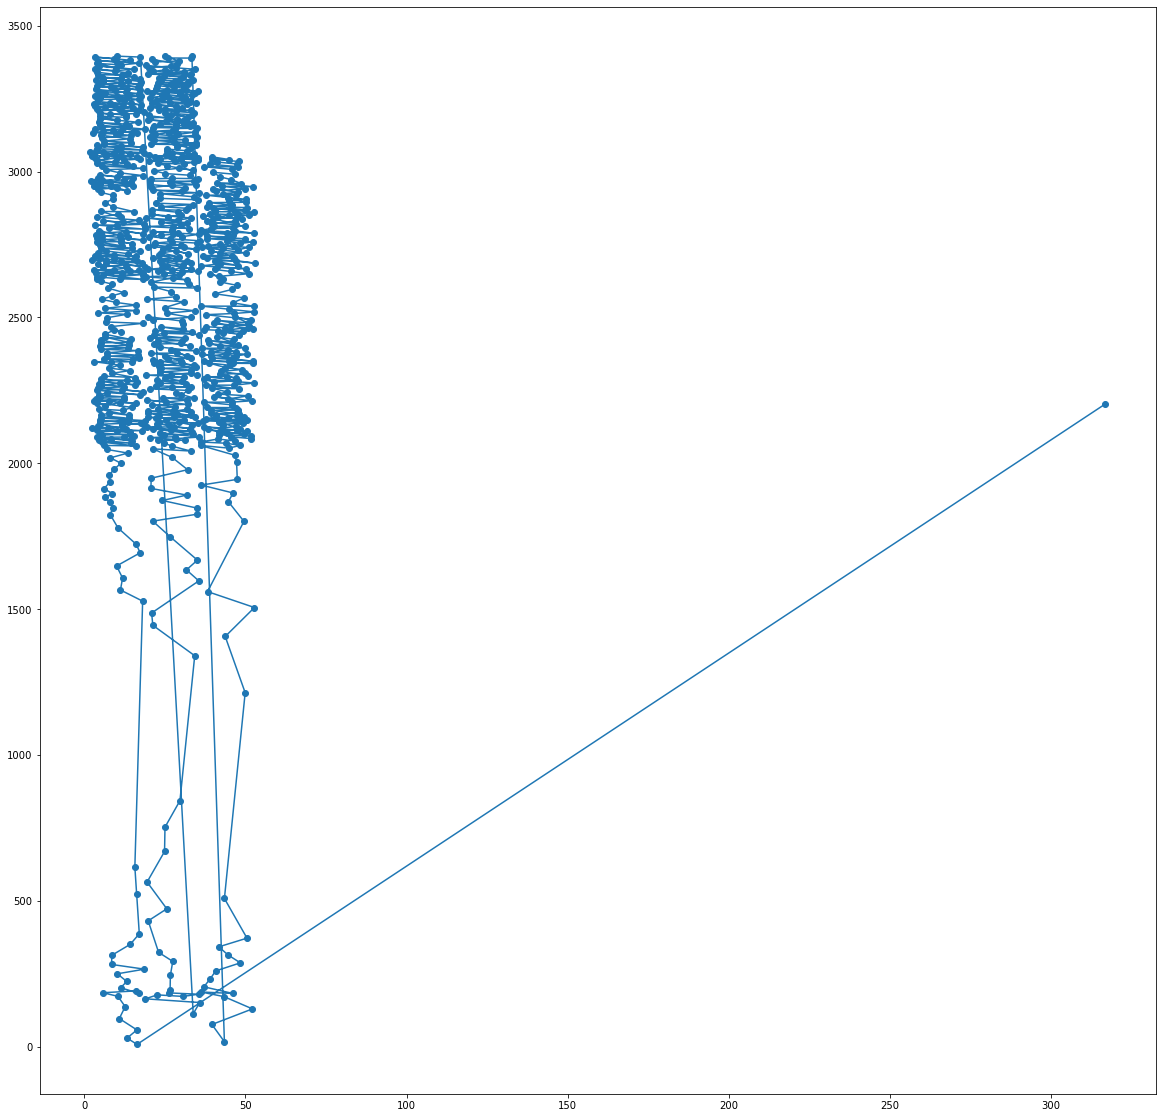

In [10]:
df_path = pd.DataFrame({'CityId':grid_sorted_cities}).merge(df_cities,how = 'left')
fig, ax = plt.subplots(figsize=(20,20))
ax.plot(df_path.iloc[0:1000,]['X'], df_path.iloc[0:1000,]['Y'],marker = 'o')

Puan açısından dilimlenmiş, sıralanmış şehirler ile büyük gelişme gerçekleşmiştir.

Yukarıdaki yolda görebileceğimiz yukarıdaki sorunlardan biri, Satıcının(Noel Baba'nın) en yüksek Y'ye sahip şehre ulaştığında, en düşük Y'ye sahip şehre geri dönmesi ve bunun aksine zikzak bir desen izleyerek yukarı doğru hareket etmeye başlamasıdır. hangisi daha verimli olmalıdır.

 Zig-zag yolu yönetmini  uygulayabiliyor muyuz ve biraz daha iyileştirme elde ediyor muyuz?

In [11]:
zigzag_sorted_cities1 = list(df_cities.iloc[1:].sort_values(['Xcuts','Ycuts','X','Y'])['CityId'])
zigzag_sorted_cities2 = list(df_cities.iloc[1:].sort_values(['Xcuts','Ycuts','X','Y'], ascending = [True,False,True,True])['CityId'])
chooser_pattern = list(df_cities.iloc[1:].sort_values(['Xcuts']).groupby(['Xcuts']).ngroup()%2)

zigzag_cities = [zigzag_sorted_cities1[i] if chooser_pattern[i] == 0 else zigzag_sorted_cities2[i] for i in range(len(chooser_pattern))]
zigzag_cities =  [0] + zigzag_cities + [0]
print('Total distance with the Zig-Zag with grid city path is '+ "{:,}".format(total_distance(df_cities,zigzag_cities)))

Total distance with the Zig-Zag with grid city path is 2,233,635.0317220334


Izgara düzeyinde bir zikzak yolu getirerek, Satıcı (Noel Baba) için en yüksek Y'den en düşük Y'ye olan uzun yolculukları ortadan kaldırdık ve puanı 3,2 milyondan 2,2 milyona daha da yükselttik.

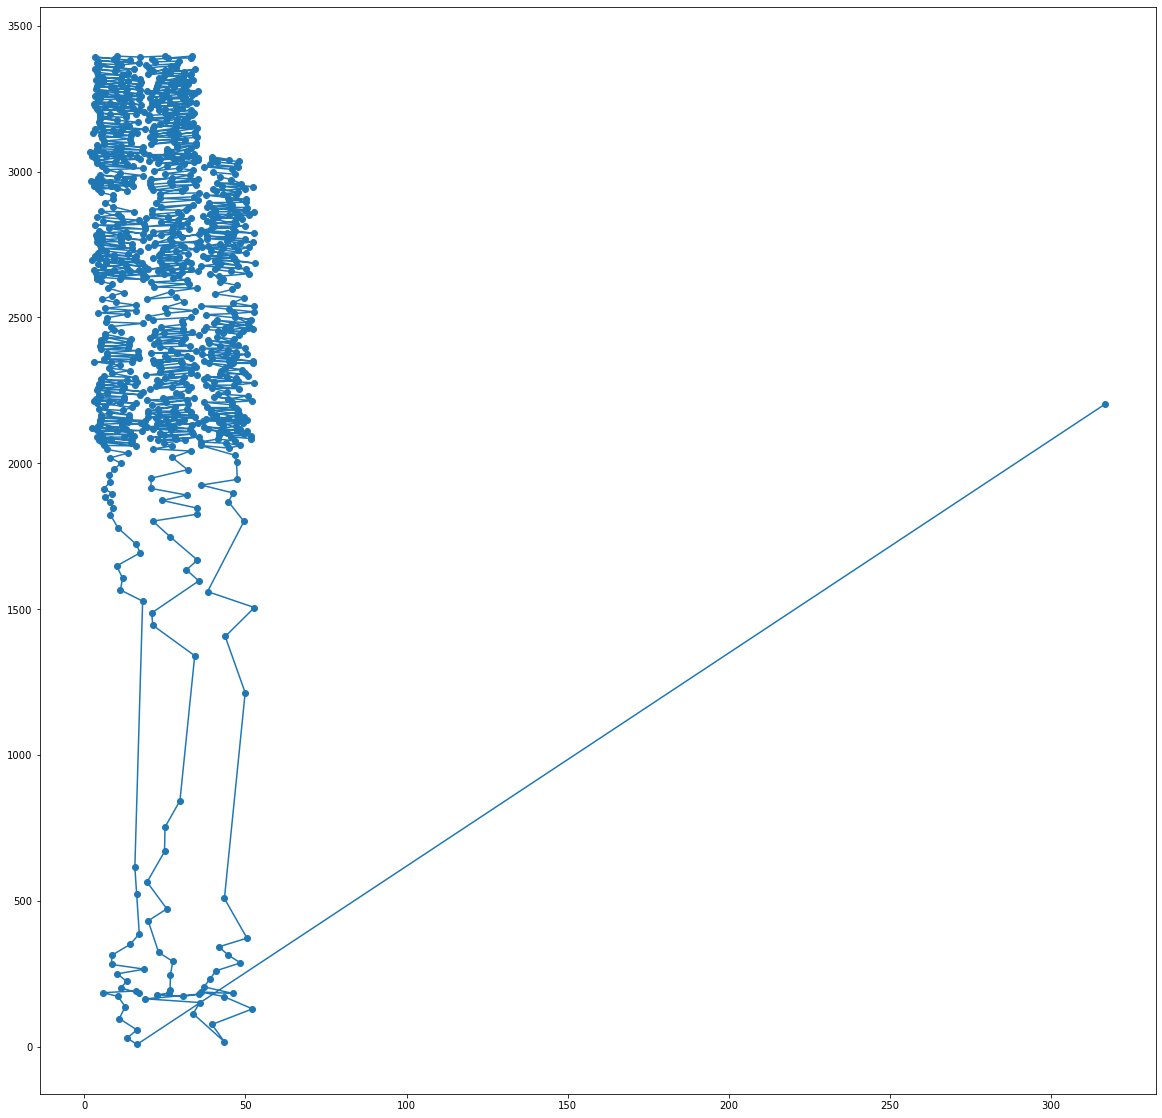

In [12]:
df_path = pd.DataFrame({'CityId':zigzag_cities}).merge(df_cities,how = 'left')
fig, ax = plt.subplots(figsize=(20,20))
ax.plot(df_path.iloc[0:1000,]['X'], df_path.iloc[0:1000,]['Y'],marker = 'o')

300x300 ızgara boyutunu keyfi olarak seçtik. Şimdi ızgara boyutunun bir fark yaratıp yaratmadığını görelim

In [13]:
for i in range(100,600,100):
    for j in range(100,600,100):
        df_cities['Ycuts'] = pd.cut(df_cities.Y,j)
        df_cities['Xcuts'] = pd.cut(df_cities.X,i)
        zigzag_sorted_cities1 = list(df_cities.iloc[1:].sort_values(['Xcuts','Ycuts','X','Y'])['CityId'])
        zigzag_sorted_cities2 = list(df_cities.iloc[1:].sort_values(['Xcuts','Ycuts','X','Y'], ascending = [True,False,True,True])['CityId'])
        chooser_pattern = list(df_cities.iloc[1:].sort_values(['Xcuts']).groupby(['Xcuts']).ngroup()%2)

        zigzag_cities = [zigzag_sorted_cities1[i] if chooser_pattern[i] == 0 else zigzag_sorted_cities2[i] for i in range(len(chooser_pattern))]
        zigzag_cities =  [0] + zigzag_cities + [0]
        print('Total distance with the Zig-Zag with grid city path with grid size (' + str(i) + ',' + str(j) + ") is {:,}".format(total_distance(df_cities,zigzag_cities)))

Total distance with the Zig-Zag with grid city path with grid size (100,100) is 3,243,001.24552974
Total distance with the Zig-Zag with grid city path with grid size (100,200) is 2,483,012.2590593975
Total distance with the Zig-Zag with grid city path with grid size (100,300) is 2,458,138.678978236
Total distance with the Zig-Zag with grid city path with grid size (100,400) is 2,600,638.502037033
Total distance with the Zig-Zag with grid city path with grid size (100,500) is 2,779,870.5123764514
Total distance with the Zig-Zag with grid city path with grid size (200,100) is 3,354,740.6090092813
Total distance with the Zig-Zag with grid city path with grid size (200,200) is 2,429,013.5317182303
Total distance with the Zig-Zag with grid city path with grid size (200,300) is 2,247,440.072765479
Total distance with the Zig-Zag with grid city path with grid size (200,400) is 2,242,396.9024366746
Total distance with the Zig-Zag with grid city path with grid size (200,500) is 2,281,677.008044

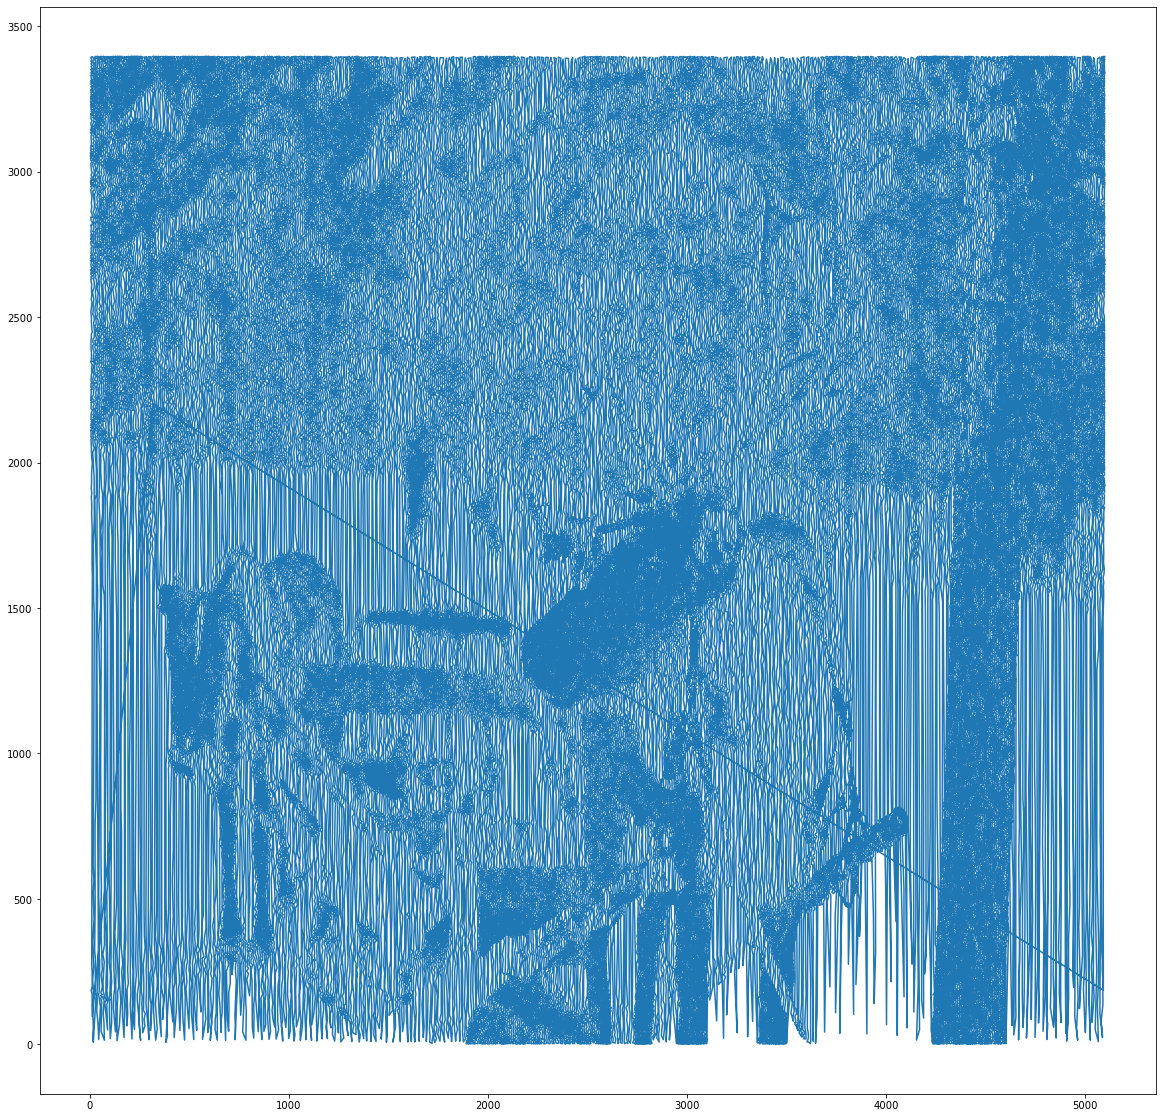

In [14]:
df_path = pd.DataFrame({'CityId':zigzag_cities}).merge(df_cities,how = 'left')
fig, ax = plt.subplots(figsize=(20,20))
ax.plot(df_path['X'], df_path['Y'])

(300.500), (300.300) 'den daha iyi ızgara boyutu gibi görünüyor, ama benim pek değil. Eh, tüm deneyler çalışmıyor.

Yukarıdaki algoritma ile son grafiğin nasıl göründüğüne bir göz atalım.

## En Yakın Komşu Algoritması/Greedy Sezgiseli

In [15]:
def nearest_neighbour():
    cities = pd.read_csv("cities.csv")
    ids = cities.CityId.values[1:]
    xy = np.array([cities.X.values, cities.Y.values]).T[1:]
    path = [0,]
    while len(ids) > 0:
        last_x, last_y = cities.X[path[-1]], cities.Y[path[-1]]
        dist = ((xy - np.array([last_x, last_y]))**2).sum(-1)
        nearest_index = dist.argmin()
        path.append(ids[nearest_index])
        ids = np.delete(ids, nearest_index, axis=0)
        xy = np.delete(xy, nearest_index, axis=0)
    path.append(0)
    return path

nnpath = nearest_neighbour()
print('Total distance with the Nearest Neighbor path '+  "is {:,}".format(total_distance(df_cities,nnpath)))

Total distance with the Nearest Neighbor path is 1,812,602.1861388374


En yakın komşu algoritması, yaklaşık 2,2 milyon maliyetten 1,8 milyona önemli bir gelişme sağladı.

En yakın komşu algoritması ile yolun nasıl göründüğüne bakalım.

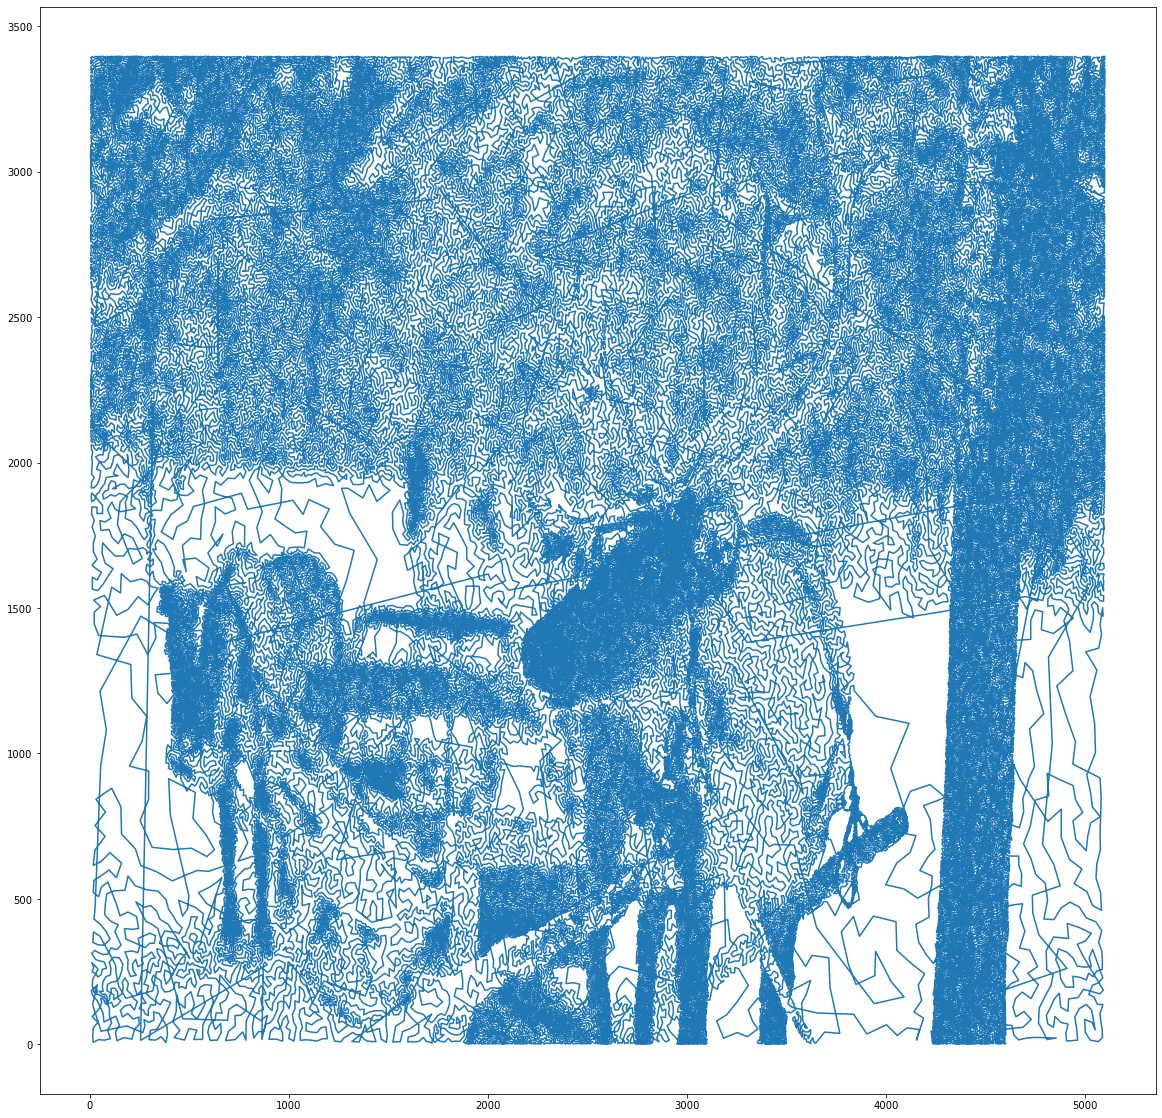

In [16]:
df_path = pd.DataFrame({'CityId':nnpath}).merge(df_cities,how = 'left')
fig, ax = plt.subplots(figsize=(20,20))
ax.plot(df_path['X'], df_path['Y'])

### Prime Swaplı En Yakın Komşu / Açgözlü Algoritma(Greedy Algoritma)

Şimdiye kadar optimizasyon için yolda asal sayılarla ilgili kısıtlamayı kullanmadık. "Asal bir CityId'den gelmedikçe her 10. adım %10 daha uzundur" diyor. Bu nedenle, asal sayıların her 10. adımın başında bitmesini sağlayarak algoritmamızı kurguluyoruz.

Yol boyunca döngü yapıyoruz, ne zaman asal CityId'ye sahip bir şehirle karşılaşırsak, toplam yolu küçültürse, onu 9 ile biten bir dizine sahip (yani 10. adım) yakındaki şehirle değiştirmeye çalışacağız.

Asal sayılı şehri şehri, mevcut şehirden önce gelen ve endeksi 9 ile biten iki şehirle veya mevcut şehirden sonra gelen ve endeksi 9 ile biten iki şehirle değiştirmeye çalışıyoruz.

Şehirleri değiştirerek yolun kısalıp kısalmadığını kontrol ederken, sadece takasa karşılık gelen alt yolun uzunluğunu kontrol edeceğiz. Tüm yolun uzunluğunu kontrol etmeye gerek yok. Bu, aramayı çok daha verimli hale getirecektir.

In [17]:
nnpath_with_primes = nnpath.copy()
for index in range(20,len(nnpath_with_primes)-30):
    city = nnpath_with_primes[index]
    if (prime_cities[city] &  ((index+1) % 10 != 0)):        
        for i in range(-1,3):
            tmp_path = nnpath_with_primes.copy()
            swap_index = (int((index+1)/10) + i)*10 - 1
            tmp_path[swap_index],tmp_path[index] = tmp_path[index],tmp_path[swap_index]
            if total_distance(df_cities,tmp_path[min(swap_index,index) - 1 : max(swap_index,index) + 2]) < total_distance(df_cities,nnpath_with_primes[min(swap_index,index) - 1 : max(swap_index,index) + 2]):
                nnpath_with_primes = tmp_path.copy() 
                break
print('Total distance with the Nearest Neighbor With Prime Swaps '+  "is {:,}".format(total_distance(df_cities,nnpath_with_primes)))

Total distance with the Nearest Neighbor With Prime Swaps is 1,811,953.6824856116


Birincil takaslarla toplam mesafeyi 650 birim daha azalttık.

#### En yakın komşu algiritması ile çözülmüş veri setini oluşturalım.

In [18]:
pd.DataFrame({'Path':nnpath_with_primes}).to_csv('M.Kutlu_SENGUL_TSP3_NN_Prime.csv',index  = False)